# Simulation
## Assignment 4.2 – Simulation-based optimization
#### Ari Viitala 432568

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
def inventory(s, d):
    inventory = [60]
    times = [0]
    end = 120
    
    stock = 60
    
    kept = 0
    backlog = 0
    
    order_count = 0
    
    demand_rate = 0.1
    probs = [1/6, 3/6, 5/6, 1]
    
    previous = 0
    demand = np.random.exponential(demand_rate)
    supply =  end + 1
    
    t = 0
    
    while t < end:
        
        if demand < supply:
            if stock > 0:
                kept += (demand - t) * stock
            else:
                backlog -= (demand - t) * stock
                
            t = demand
            
            amount = np.random.random()
            for i in range(0,4):
                if amount < probs[i]:
                    amount = i + 1
                    break
                    
            stock -= amount 
            demand = t + np.random.exponential(demand_rate)
            
            times.append(t)
            inventory.append(stock)
            
            if stock < s and supply == end + 1:
                order_count += 1
                supply = t + np.random.uniform(0.5, 1)
        else:
            
            if stock > 0:
                kept += (supply - t) * stock
            else:
                backlog -= (supply - t) * stock
                
            t = supply 
            stock += d
            
            times.append(t)
            inventory.append(stock)
            
            if stock < s:
                order_count += 1
                supply = t + np.random.uniform(0.5, 1)
            else:
                supply = end + 1
                
    if stock > 0:
        kept += (end - t) * stock
    else:
        backlog -= (end - t) * stock
        
    cost = kept * 1 + backlog * 5 + order_count * (32 + d * 3)
    return cost / end, times, inventory 

113.6496463402426


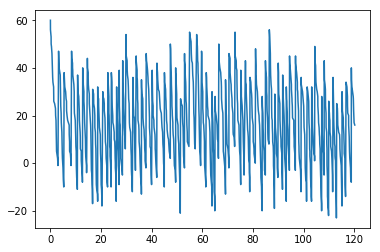

In [193]:
i = inventory(13, 48)
print(i[0])
plt.plot(i[1], i[2])

In [226]:
def gradient(s, d, step, iterations):
    diag = round(np.sqrt(step), 0)
    current = 0
    for i in range(0, iterations):
        current += inventory(s,d)[0]
    current = current / iterations
    dir = [0] * 8
    for i in range(0, iterations):
        dir[0] = (inventory(s - step, d)[0] - current) / iterations
        dir[1] = (inventory(s - diag, d - diag)[0] - current) / iterations
        dir[2] = (inventory(s, d - step)[0] - current) / iterations
        dir[3] = (inventory(s + diag, d - diag)[0] - current) / iterations
        dir[4] = (inventory(s + step, d)[0] - current) / iterations
        dir[5] = (inventory(s + diag, d + diag)[0] - current) / iterations
        dir[6] = (inventory(s, d + step)[0] - current) / iterations
        dir[7] = (inventory(s - diag, d + diag)[0] - current) / iterations
    
    return dir.index(min(dir)), min(dir) 

In [372]:
s = 90
d = 90
step =12
iterations = 25
direction, slope = gradient(s, d, step, iterations)
S = [s]
D = [d]
while slope < 0:
    if direction == 0:
        s -= step
    elif direction == 1:
        s += step
    elif direction == 2:
        d -= step
    elif direction == 1:
        s += step
    elif direction == 2:
        d -= step
    elif direction == 1:
        s += step
    elif direction == 2:
        d -= step 
    else: 
        d += step
    S.append(s)
    D.append(d)
    direction, slope = gradient(s, d, step, iterations)
print(s)
print(d)
print(slope)

18
42
0.031215382784604343


In [357]:
runs = 3
s_lo = 0
s_hi = 100
d_lo = 15
d_hi = 100
sweep = np.empty((s_hi - s_lo, d_hi - d_lo), float)
for i in range(s_lo,s_hi):
    for j in range(d_lo, d_hi):
        counter = 0
        for k in range(0, runs):
            counter += inventory(i, j)[0]
        sweep[i - s_lo, j - d_lo] = counter / runs

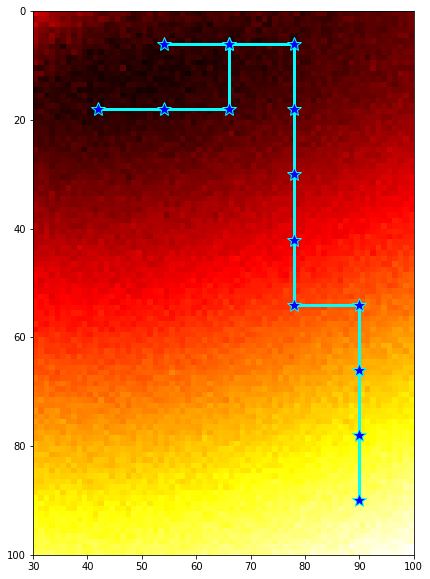

In [373]:
plt.figure(1, (10,10))
imgplot = plt.imshow(sweep[:, 15:], extent = (30,100, 100, 0))
imgplot.set_cmap('hot')
plt.plot(D, S, "cyan", linewidth = 3.0, marker = "*", markersize = 15.0, mfc = "b")
plt.show()